In [46]:
import pandas as pd
import csv

# Read the CSV file
births = pd.read_csv('baby.csv')
type(births['Birth Weight'])


pandas.core.series.Series

In [47]:

# Display the column names
print("Columns in the DataFrame:")
print(births.columns.tolist())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(births.head())

Columns in the DataFrame:
['Birth Weight', 'Gestational Days', 'Maternal Age', 'Maternal Height', 'Maternal Pregnancy Weight', 'Maternal Smoker']

First few rows of the DataFrame:
   Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False  


In [48]:
births.shape

(1174, 6)

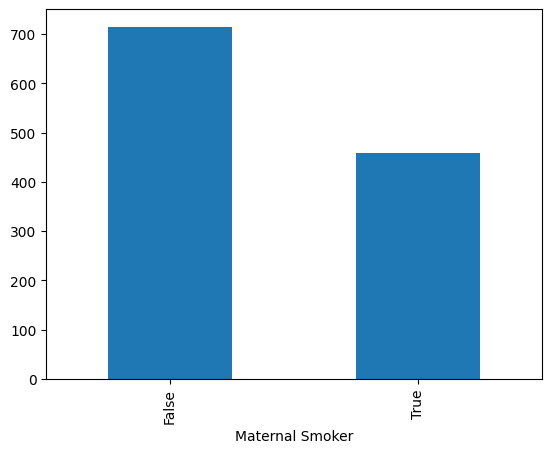

In [49]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');


In [50]:

import seaborn as sns
import matplotlib.pyplot as plt



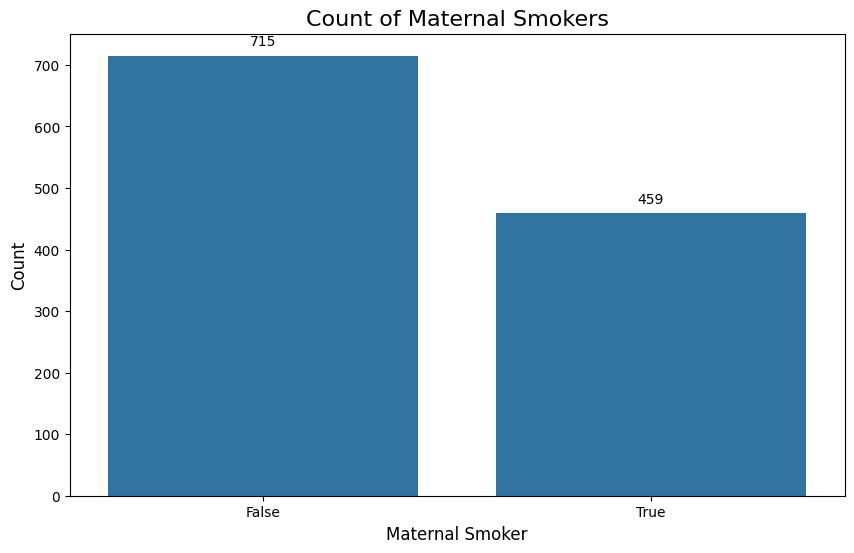

In [51]:

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Maternal Smoker', data=births)

# Customize the plot
plt.title('Count of Maternal Smokers', fontsize=16)
plt.xlabel('Maternal Smoker', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

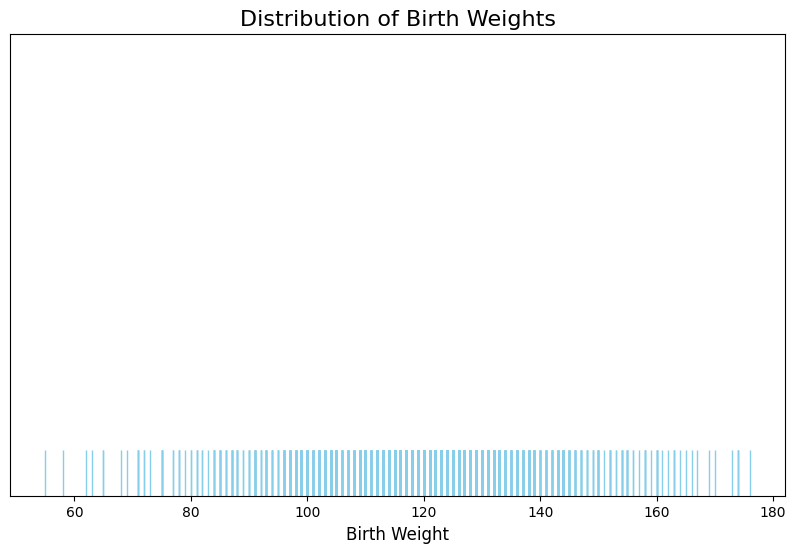

In [52]:

# Create the rugplot
plt.figure(figsize=(10, 6))
sns.rugplot(data=births, x='Birth Weight', height=0.1, color='skyblue')

# Customize the plot
plt.title('Distribution of Birth Weights', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('', fontsize=12)  # Empty y-label as it's not needed for a rugplot
plt.ylim(0, 1)  # Set y-axis limit to match the image

# Remove y-axis ticks
plt.yticks([])

# Show the plot
plt.show()

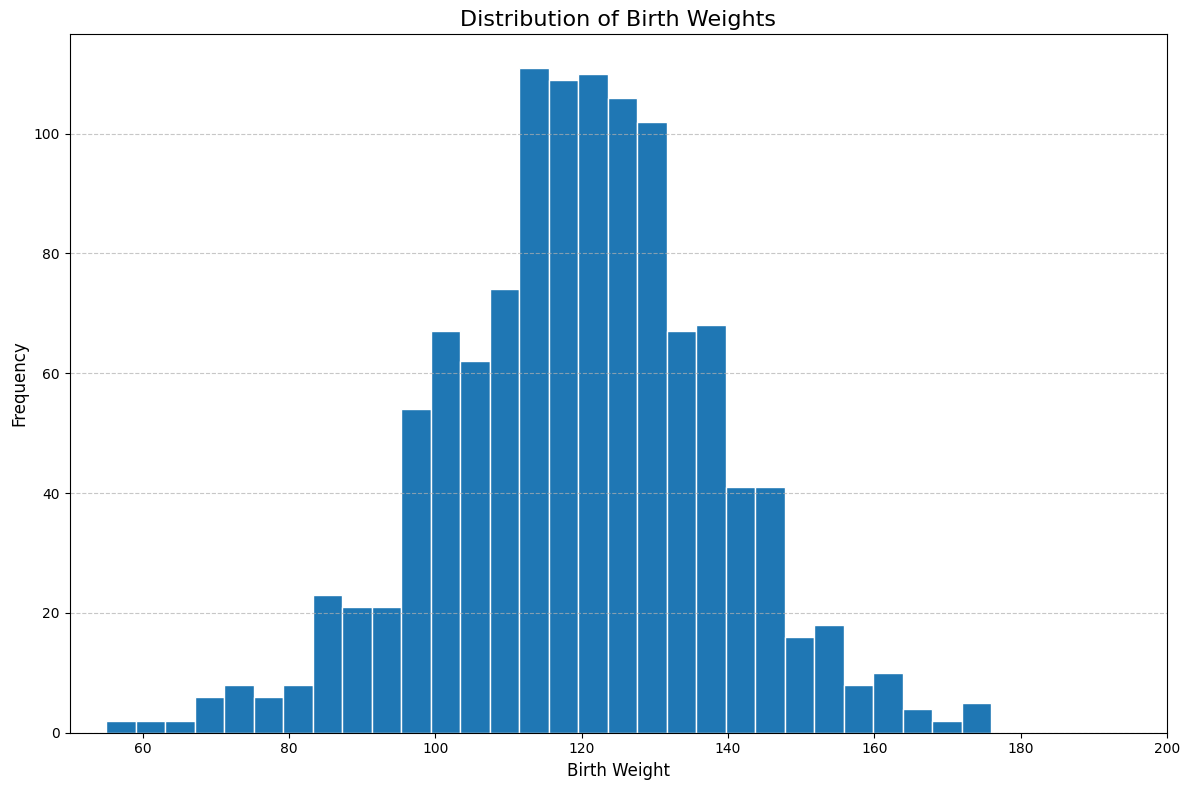

In [53]:
import matplotlib.pyplot as plt


# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(births['Birth Weight'], bins=30,ec='w')

# Customize the plot
plt.title('Distribution of Birth Weights', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis limits to match the image
plt.xlim(50, 200)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

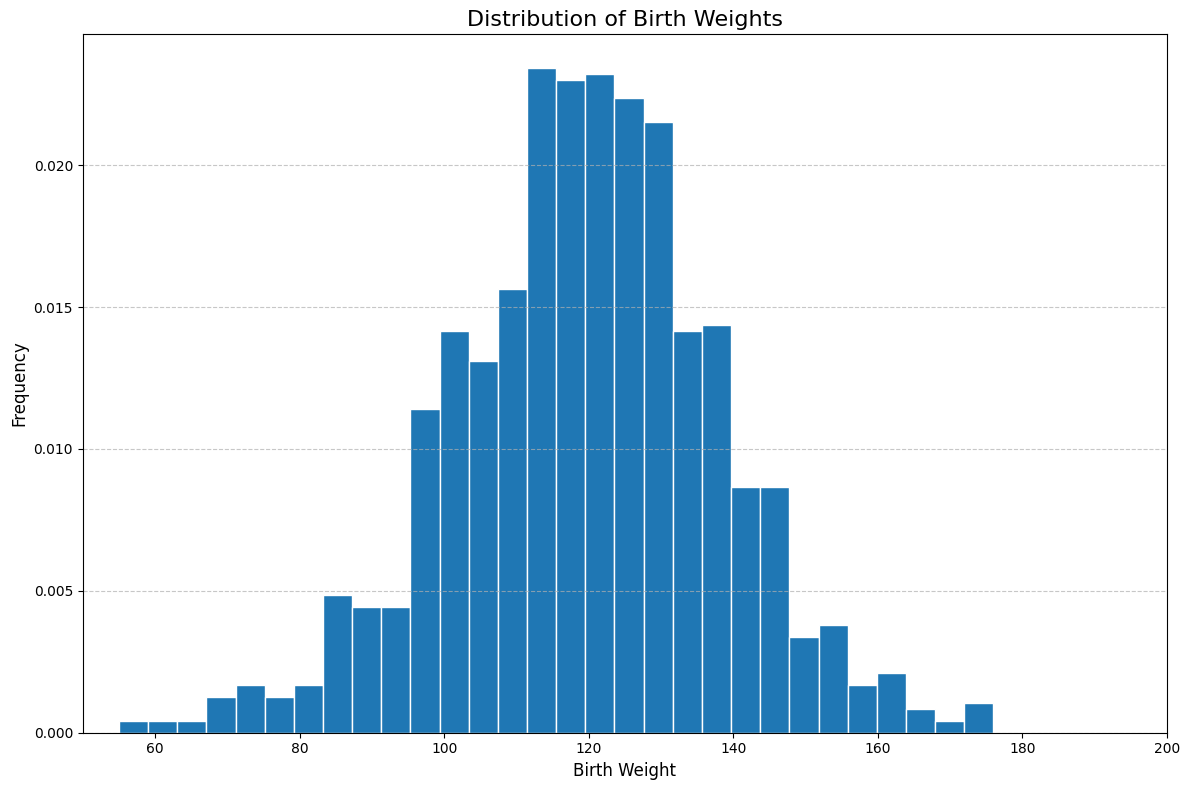

In [54]:

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(births['Birth Weight'], bins=30, ec='w', density=True)

# Customize the plot
plt.title('Distribution of Birth Weights', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis limits to match the image
plt.xlim(50, 200)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Birth Weight', ylabel='Count'>

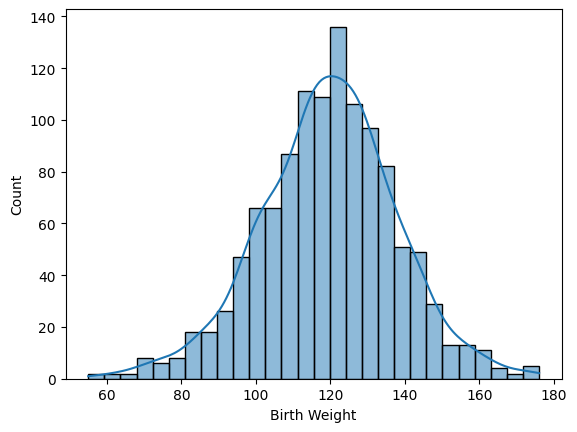

In [55]:
sns.histplot(births['Birth Weight'], kde=True)


<Axes: xlabel='Birth Weight', ylabel='Density'>

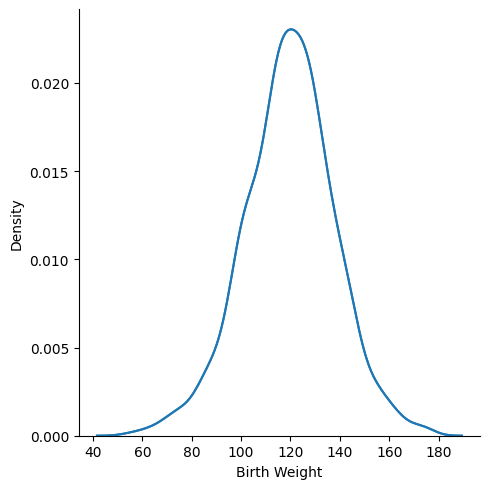

In [56]:
sns.displot(births['Birth Weight'], kind='kde')
sns.kdeplot(births['Birth Weight'])


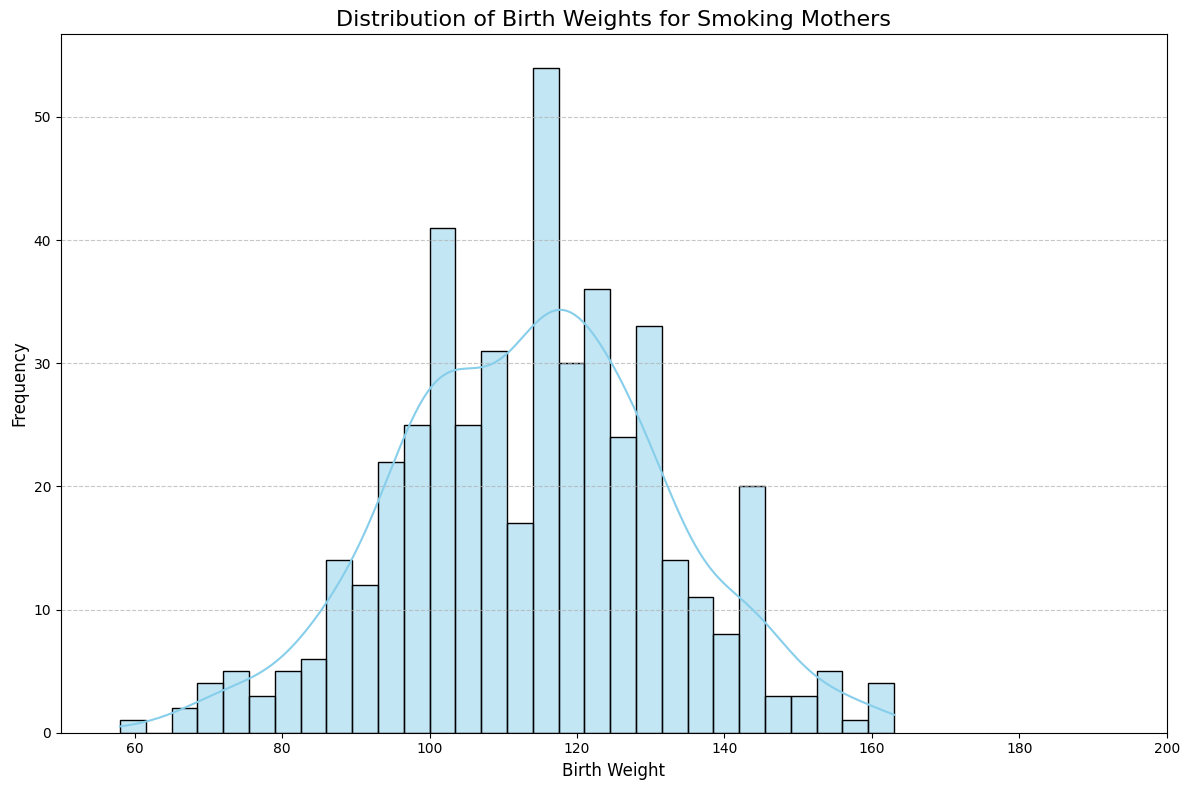

Statistics for Birth Weights of babies born to smoking mothers:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth Weight, dtype: float64


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Filter the DataFrame for smoking mothers
smoking_mothers = births[births['Maternal Smoker'] == True]

# Create the histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=smoking_mothers, x='Birth Weight', bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Birth Weights for Smoking Mothers', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis limits (adjust if needed)
plt.xlim(50, 200)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("Statistics for Birth Weights of babies born to smoking mothers:")
print(smoking_mothers['Birth Weight'].describe())

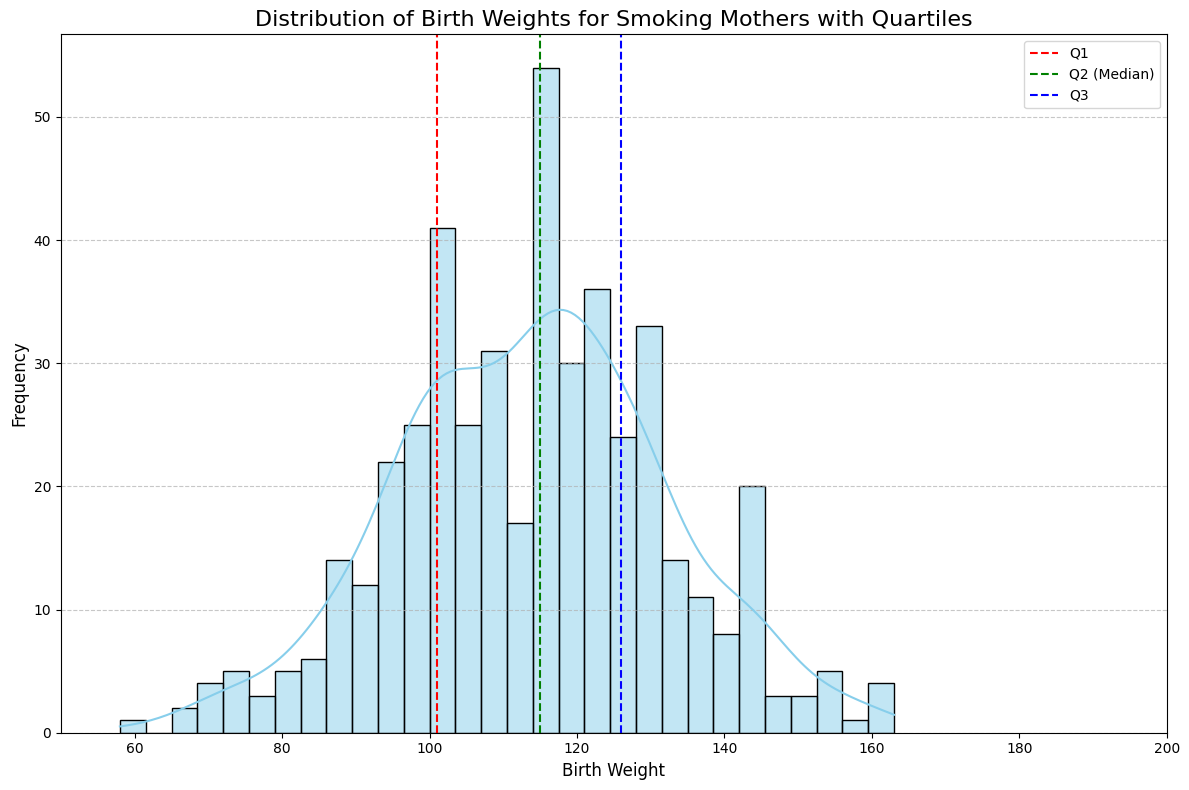

Q1 (25th percentile): 101.00
Q2 (Median): 115.00
Q3 (75th percentile): 126.00

Statistics for Birth Weights of babies born to smoking mothers:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth Weight, dtype: float64


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Filter the DataFrame for smoking mothers
smoking_mothers = births[births['Maternal Smoker'] == True]

# Calculate quartiles
q1, q2, q3 = np.percentile(smoking_mothers['Birth Weight'], [25, 50, 75])

# Create the histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=smoking_mothers, x='Birth Weight', bins=30, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for quartiles
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

# Customize the plot
plt.title('Distribution of Birth Weights for Smoking Mothers with Quartiles', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis limits (adjust if needed)
plt.xlim(50, 200)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print quartile values
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")

# Print some additional statistics
print("\nStatistics for Birth Weights of babies born to smoking mothers:")
print(smoking_mothers['Birth Weight'].describe())

Text(0, 0.5, '')

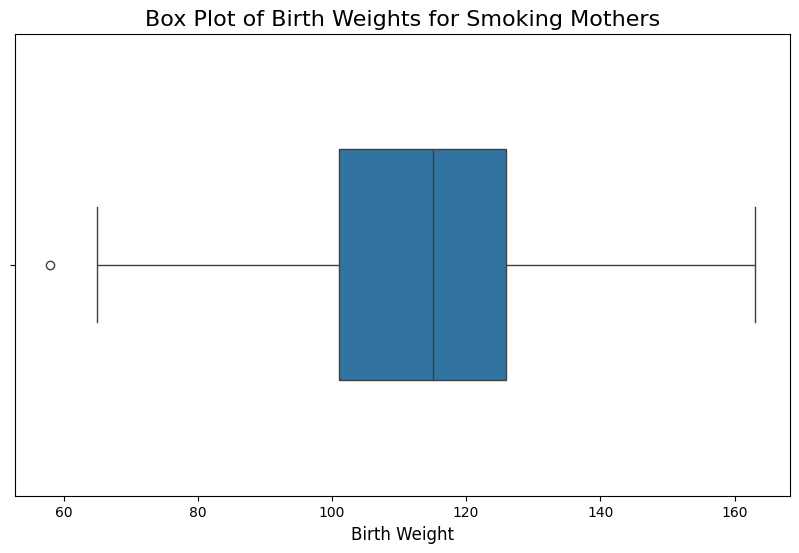

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Filter the DataFrame for smoking mothers
smoking_mothers = births[births['Maternal Smoker'] == True]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=smoking_mothers['Birth Weight'], width=0.5)

# Customize the plot
plt.title('Box Plot of Birth Weights for Smoking Mothers', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('', fontsize=12)  # Empty y-label as it's not needed for

Lower Quartile (Q1): 101.00
Upper Quartile (Q3): 126.00
Interquartile Range (IQR): 25.00
Lower Whisker: 63.50
Upper Whisker: 163.50


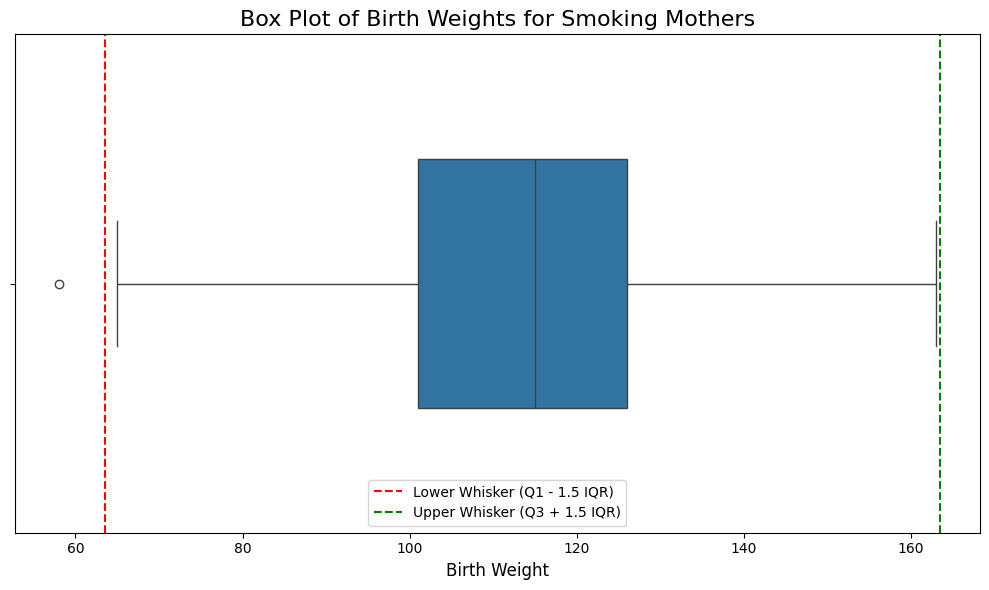


Statistics for Birth Weights of babies born to smoking mothers:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth Weight, dtype: float64


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Filter the DataFrame for smoking mothers
smoking_mothers = births[births['Maternal Smoker'] == True]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=smoking_mothers['Birth Weight'], width=0.5)

# Customize the plot
plt.title('Box Plot of Birth Weights for Smoking Mothers', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('', fontsize=12)  # Empty y-label as it's not needed for a single box plot

# Calculate IQR and whisker limits
Q1 = smoking_mothers['Birth Weight'].quantile(0.25)
Q3 = smoking_mothers['Birth Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Add vertical lines for whisker limits
plt.axvline(x=lower_whisker, color='r', linestyle='--', label='Lower Whisker (Q1 - 1.5 IQR)')
plt.axvline(x=upper_whisker, color='g', linestyle='--', label='Upper Whisker (Q3 + 1.5 IQR)')

# Add legend
plt.legend(fontsize=10)

# Print calculated values
print(f"Lower Quartile (Q1): {Q1:.2f}")
print(f"Upper Quartile (Q3): {Q3:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Lower Whisker: {lower_whisker:.2f}")
print(f"Upper Whisker: {upper_whisker:.2f}")

# Show the plot
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nStatistics for Birth Weights of babies born to smoking mothers:")
print(smoking_mothers['Birth Weight'].describe())

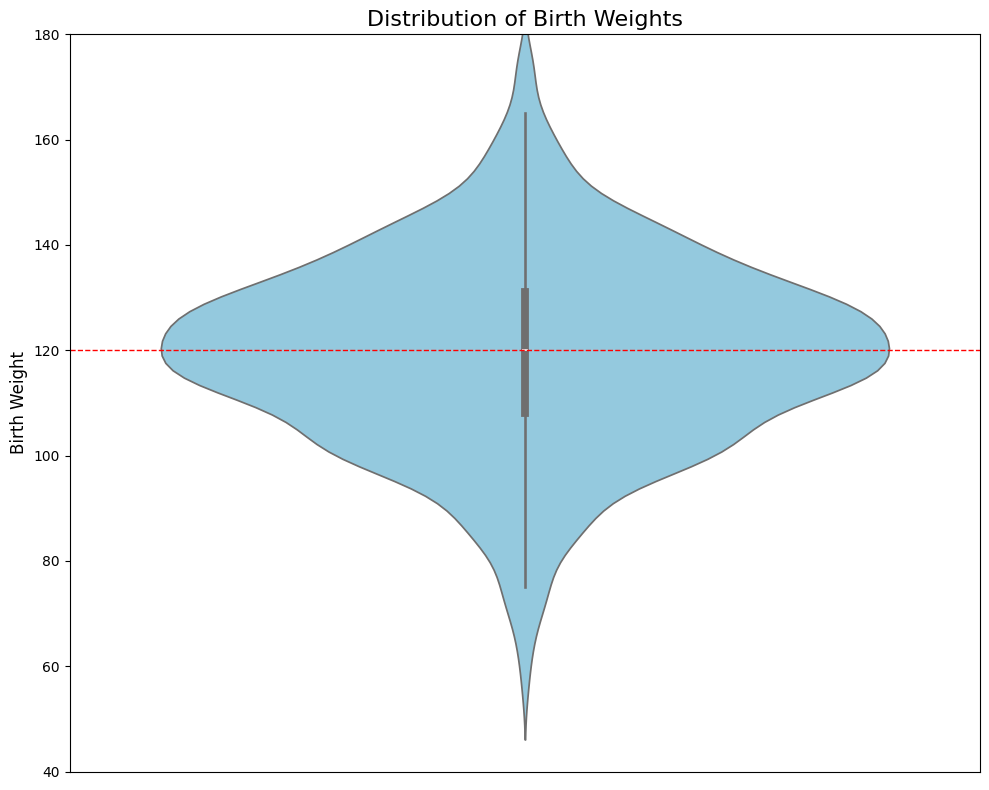

Statistics for Birth Weights:
count    1174.000000
mean      119.462521
std        18.328671
min        55.000000
25%       108.000000
50%       120.000000
75%       131.000000
max       176.000000
Name: Birth Weight, dtype: float64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(y=births['Birth Weight'], color='skyblue', inner='box')

# Customize the plot
plt.title('Distribution of Birth Weights', fontsize=16)
plt.ylabel('Birth Weight', fontsize=12)
plt.xlabel('')  # Remove x-label as it's not needed for a single violin plot

# Adjust y-axis limits to match the image (if needed)
plt.ylim(40, 180)

# Remove x-axis ticks
plt.xticks([])

# Add a thin line at the median
median = births['Birth Weight'].median()
plt.axhline(y=median, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("Statistics for Birth Weights:")
print(births['Birth Weight'].describe())

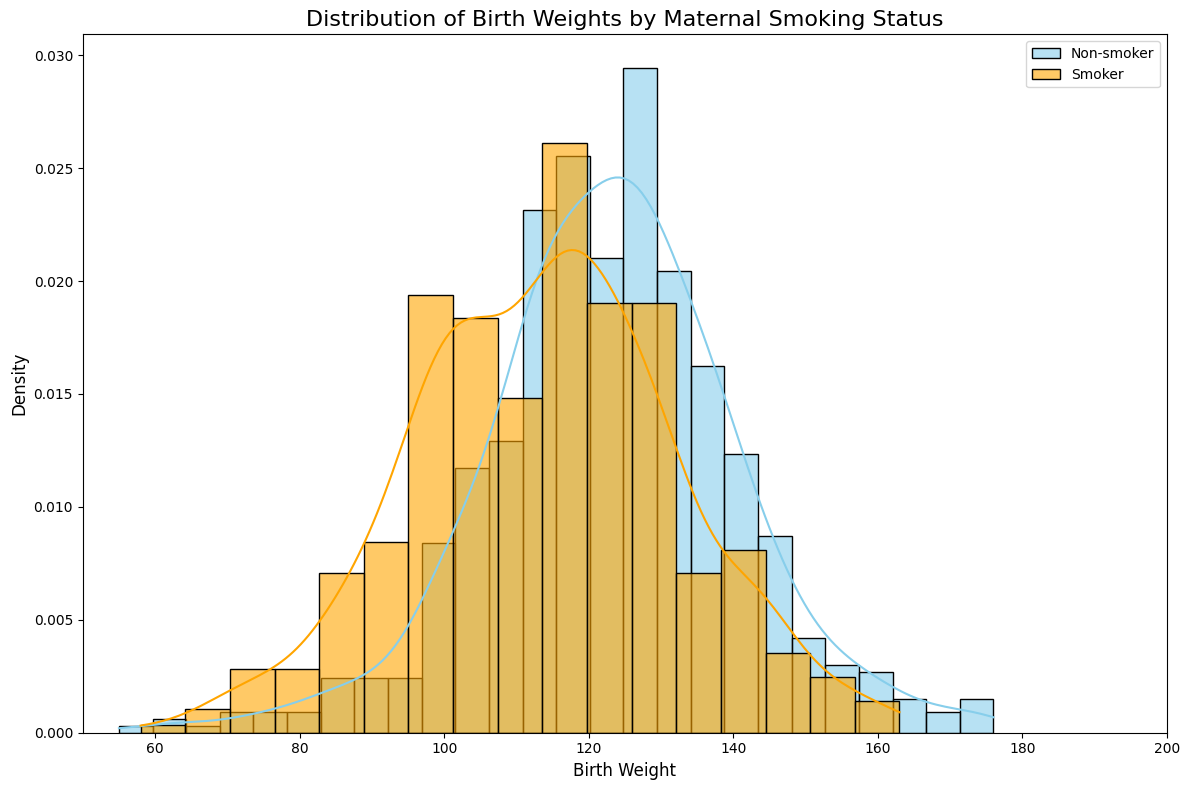

Statistics for Birth Weights:
                 count        mean        std   min    25%    50%    75%  \
Maternal Smoker                                                            
False            715.0  123.085315  17.423695  55.0  113.0  123.0  134.0   
True             459.0  113.819172  18.295010  58.0  101.0  115.0  126.0   

                   max  
Maternal Smoker         
False            176.0  
True             163.0  


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Create the plot
plt.figure(figsize=(12, 8))

# Plot histograms and KDE for non-smokers
sns.histplot(data=births[births['Maternal Smoker'] == False], x='Birth Weight', 
             kde=True, color='skyblue', alpha=0.6, label='Non-smoker', stat='density')

# Plot histograms and KDE for smokers
sns.histplot(data=births[births['Maternal Smoker'] == True], x='Birth Weight', 
             kde=True, color='orange', alpha=0.6, label='Smoker', stat='density')

# Customize the plot
plt.title('Distribution of Birth Weights by Maternal Smoking Status', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Adjust x-axis limits if needed
plt.xlim(50, 200)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("Statistics for Birth Weights:")
print(births.groupby('Maternal Smoker')['Birth Weight'].describe())

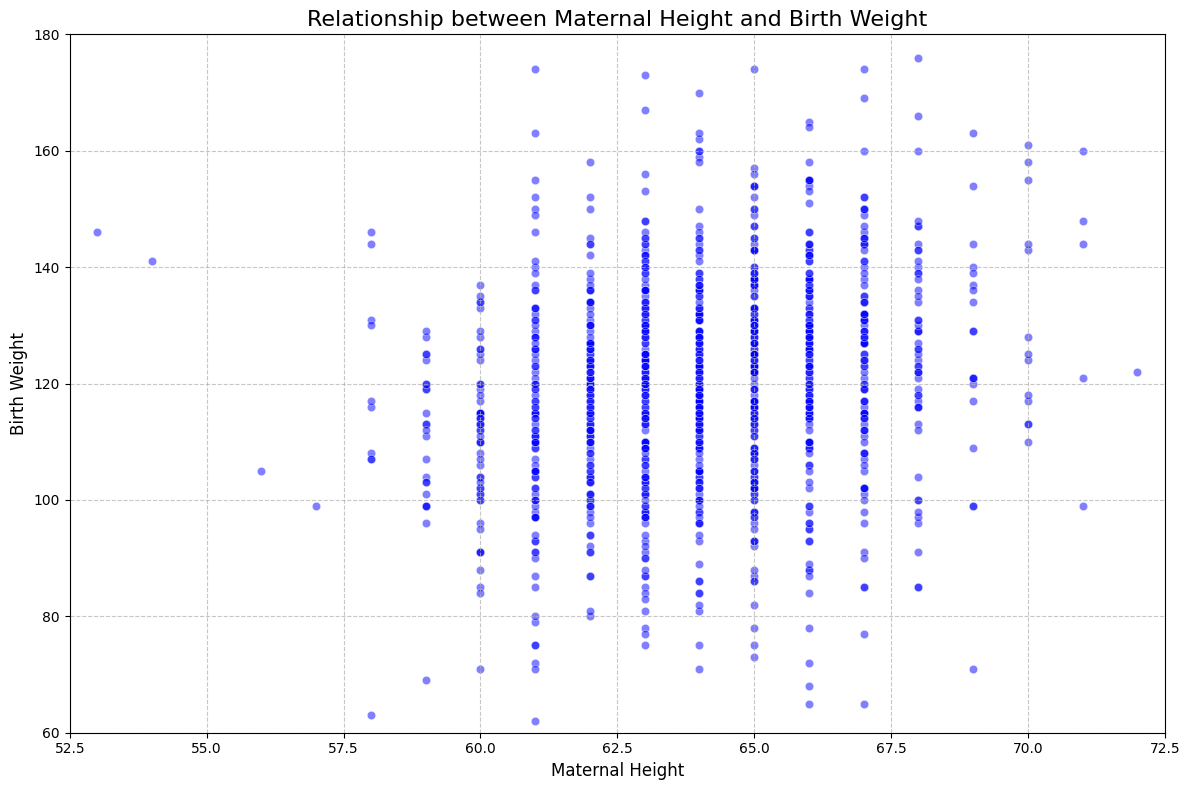

Correlation coefficient between Maternal Height and Birth Weight: 0.2037


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=births, x='Maternal Height', y='Birth Weight', alpha=0.5, color='blue')

# Customize the plot
plt.title('Relationship between Maternal Height and Birth Weight', fontsize=16)
plt.xlabel('Maternal Height', fontsize=12)
plt.ylabel('Birth Weight', fontsize=12)

# Set axis limits to match the image
plt.xlim(52.5, 72.5)
plt.ylim(60, 180)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print correlation coefficient
correlation = births['Maternal Height'].corr(births['Birth Weight'])
print(f"Correlation coefficient between Maternal Height and Birth Weight: {correlation:.4f}")

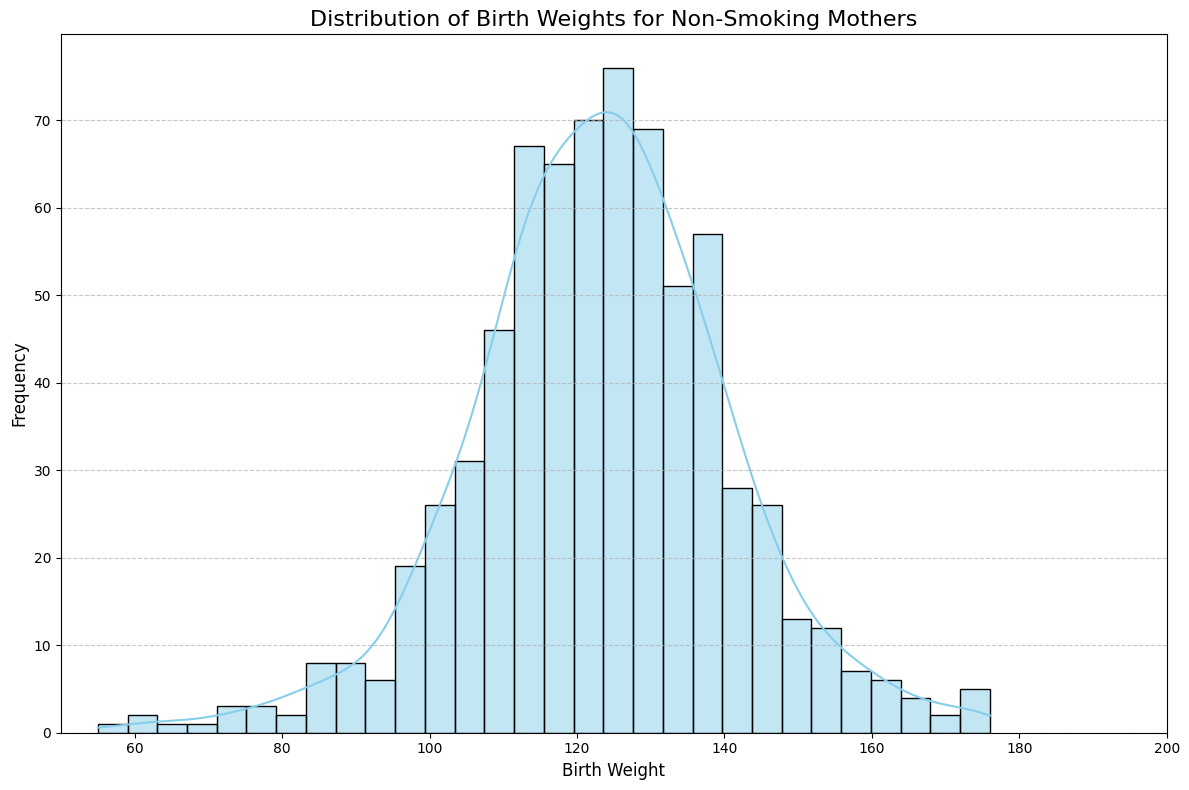

Statistics for Birth Weights of babies born to non-smoking mothers:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth Weight, dtype: float64


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Filter the DataFrame for non-smoking mothers
non_smoking_mothers = births[births['Maternal Smoker'] == False]

# Create the histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=non_smoking_mothers, x='Birth Weight', bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Birth Weights for Non-Smoking Mothers', fontsize=16)
plt.xlabel('Birth Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis limits (adjust if needed)
plt.xlim(50, 200)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("Statistics for Birth Weights of babies born to non-smoking mothers:")
print(non_smoking_mothers['Birth Weight'].describe())

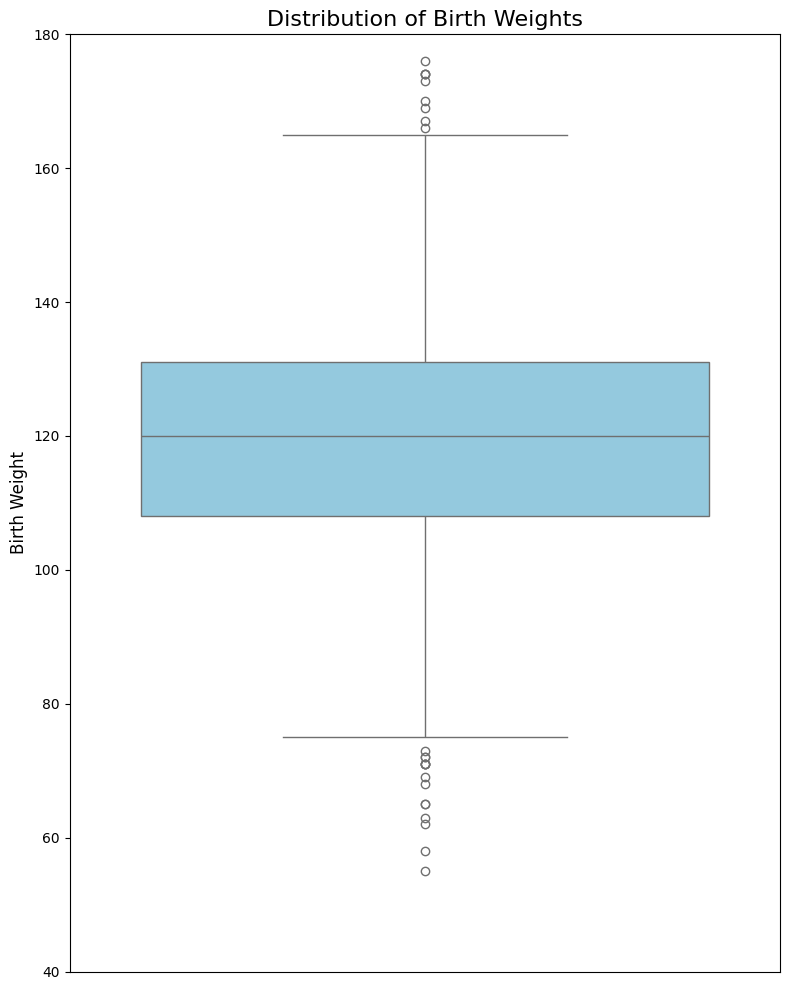

Statistics for Birth Weights:
count    1174.000000
mean      119.462521
std        18.328671
min        55.000000
25%       108.000000
50%       120.000000
75%       131.000000
max       176.000000
Name: Birth Weight, dtype: float64


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'births' DataFrame is already loaded
# If not, uncomment the following line:
# births = pd.read_csv('baby.csv')

# Create the box plot
plt.figure(figsize=(8, 10))
sns.boxplot(y=births['Birth Weight'], color='skyblue')

# Customize the plot
plt.title('Distribution of Birth Weights', fontsize=16)
plt.ylabel('Birth Weight', fontsize=12)
plt.xlabel('')  # Remove x-label as it's not needed for a single box plot

# Adjust y-axis limits to match the image
plt.ylim(40, 180)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("Statistics for Birth Weights:")
print(births['Birth Weight'].describe())